# Tesla Stock Price Prediction

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# read dataset

df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-21,327.985992,335.000000,311.600006,313.671997,313.671997,80536000
1,2020-07-22,319.799988,325.283997,312.399994,318.466003,318.466003,70805500
2,2020-07-23,335.790009,337.799988,296.153992,302.614014,302.614014,121642500
3,2020-07-24,283.201996,293.000000,273.308014,283.399994,283.399994,96983000
4,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
...,...,...,...,...,...,...,...
248,2021-07-15,658.390015,666.140015,637.880005,650.599976,650.599976,20209600
249,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800
250,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100
251,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15442700


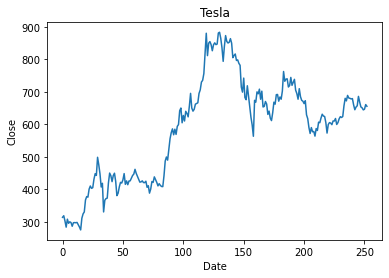

In [3]:
#Visualize 'close' column

close = df['Close']

ax = close.plot(title = 'Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')

plt.show()



In [4]:
#convert columns date to datetime

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format= True)

#Create a new DF with Date and Close columns

df = df[['Close', 'Date']]

In [5]:
#Check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   253 non-null    float64       
 1   Date    253 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [6]:
#rename columns

df = df.rename(columns= {'Date': 'ds', 'Close': 'y'})

In [7]:
model= Prophet()
model.fit(df)
predict = model.make_future_dataframe(periods = 365)
forecast = model.predict(predict)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2022-07-17,383.349986,-181.127556,966.878592
614,2022-07-18,374.108649,-201.480333,944.483289
615,2022-07-19,377.677687,-191.055250,952.272713
616,2022-07-20,375.601881,-173.032537,945.998117
617,2022-07-21,373.968832,-210.355235,943.795786


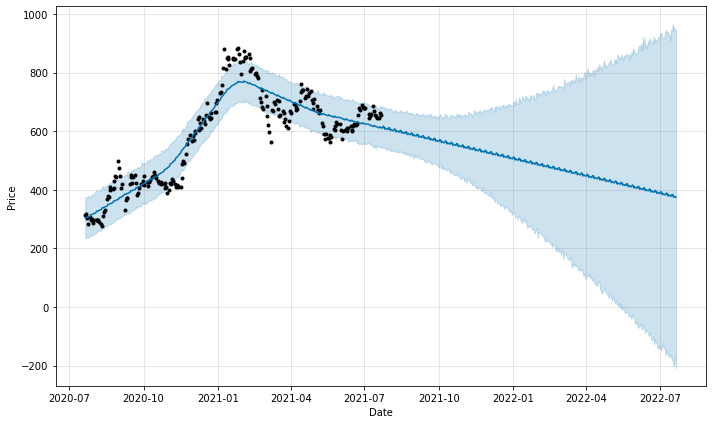

In [8]:
graph = model.plot(forecast, xlabel = 'Date', ylabel = 'Price')